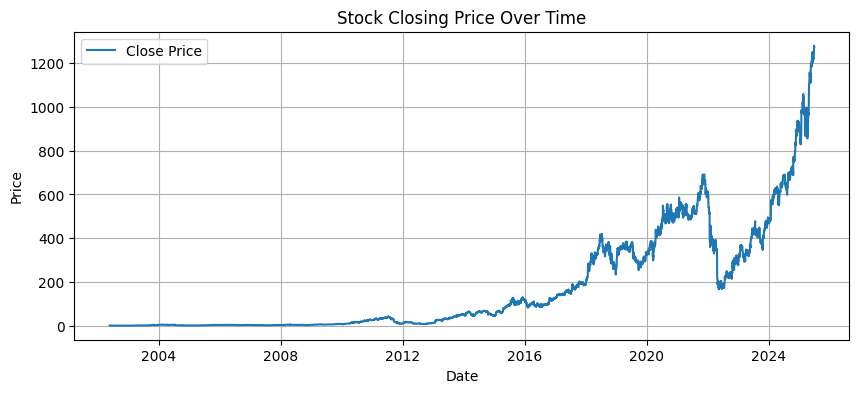

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

# Load data
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/pricepulse/Data/Netflix_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Plot closing price
plt.figure(figsize=(10,4))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()




In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Extract and scale 'Close' column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

print(scaled_data[:5])  # Preview scaled values


[[0.00064405]
 [0.00065466]
 [0.00061333]
 [0.00057143]
 [0.0005463 ]]


In [29]:
import os
# Create time series windows
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, 60)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

os.makedirs('data', exist_ok=True)
np.save('data/X.npy', X)
np.save('data/y.npy', y)


import os
import numpy as np

# Ensure the directory exists
os.makedirs('../data', exist_ok=True)

# Save data
np.save('../data/X.npy', X)
np.save('../data/y.npy', y)

print("✅ Data saved as ../data/X.npy and ../data/y.npy")
